In [306]:
#import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime as dt
import numpy as np

#st.title("CNN JOB MON")

def load_data():
    url = 'http://43.202.66.118:8077/all'
    r = requests.get(url)
    d = r.json()

    return d

In [307]:
data = load_data()
df = pd.DataFrame(data)
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29


In [298]:
#import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime as dt
import numpy as np

In [299]:
#st.title("CNN JOB MON")

def load_data():
    url = 'http://43.202.66.118:8077/all'
    r = requests.get(url)
    d = r.json()

    return d
    
data = load_data()
df = pd.DataFrame(data)
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29


In [300]:
# request_time을 datetime으로 변환
df['request_time'] = pd.to_datetime(df['request_time'])

# request_time을 시간 단위로 그룹화하고 요청 수 계산
df['request_hour'] = df['request_time'].dt.strftime('%Y-%m-%d %H')  # 시간 단위로 포맷
#방법1
#df_grouped = df.groupby('request_hour').size().reset_index(name='Number of Requests')

#방법2
#df_grouped = df.groupby('request_hour').count().reset_index()
#df_grouped

#방법3
df_grouped = df.groupby('request_hour').count()
df_grouped

df_grouped['request_hour'] = df_grouped.index  # 인덱스를 새로운 열로 추가
df_grouped['Number of Requests'] = df_grouped['num']

In [301]:
data = load_data()
df = pd.DataFrame(data)
df

# request_time을 datetime으로 변환
df['request_time'] = pd.to_datetime(df['request_time'])

# request_time을 시간 단위로 그룹화하고 요청 수 계산
df['request_hour'] = df['request_time'].dt.strftime('%Y-%m-%d %H')  # 시간 단위로 포맷
#방법1
#df_grouped = df.groupby('request_hour').size().reset_index(name='Number of Requests')

#방법2
#df_grouped = df.groupby('request_hour').count().reset_index()
#df_grouped

#방법3
df_grouped = df.groupby('request_hour').count()
df_grouped

df_grouped['request_hour'] = df_grouped.index  # 인덱스를 새로운 열로 추가
df_grouped['Number of Requests'] = df_grouped['num']

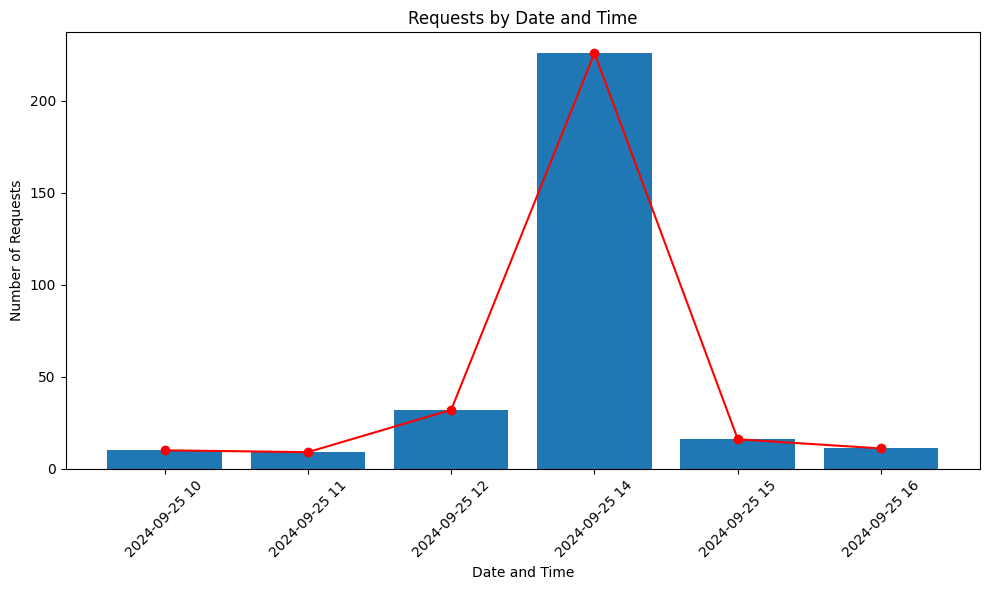

In [302]:
# x축을 시간으로, y축을 요청 수로 하는 그래프 그리기
x = df_grouped['request_hour']
y = df_grouped['Number of Requests']

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.plot(x,y, 'ro-')
plt.xticks(rotation=45)  # x축 레이블이 겹치지 않도록 90도 회전
plt.xlabel('Date and Time')
plt.ylabel('Number of Requests')
plt.title('Requests by Date and Time')

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
df['request_user']=df['request_user'].astype(str)
requestu=df.groupby('request_user').size()

# df_groupuser['request_count'] = df.groupby('request_user').size['num']
# #df_groupuser['key'] = df_grouped.index
# #df_groupuser['key']
# df_groupuser['request_count']

df['prediction_model']=df['prediction_model'].astype(str)
predictionm=df.groupby('prediction_model').size()

# #size() 
# df_prediction = df.groupby('prediction_model').size()
# df_prediction

plt.figure(figsize=(16, 8))
plt.bar(requestu.index, requestu.values, width=0.4, label='request', color='blue', align='center')
plt.bar(predictionm.index, predictionm.values, width=0.4, label='predicton', color='red', align="edge")

plt.title('Request user(BLUE) and Prediction(RED) Counts over Time')
plt.xlabel('time')
plt.ylabel('count')

# plt.figure(figsize=(16,8))
# #.index .values
# plt.bar(df_groupuser.index, df_groupuser.values)
# plt.bar(df_prediction.index, df_prediction.values)

Text(0, 0.5, 'count')

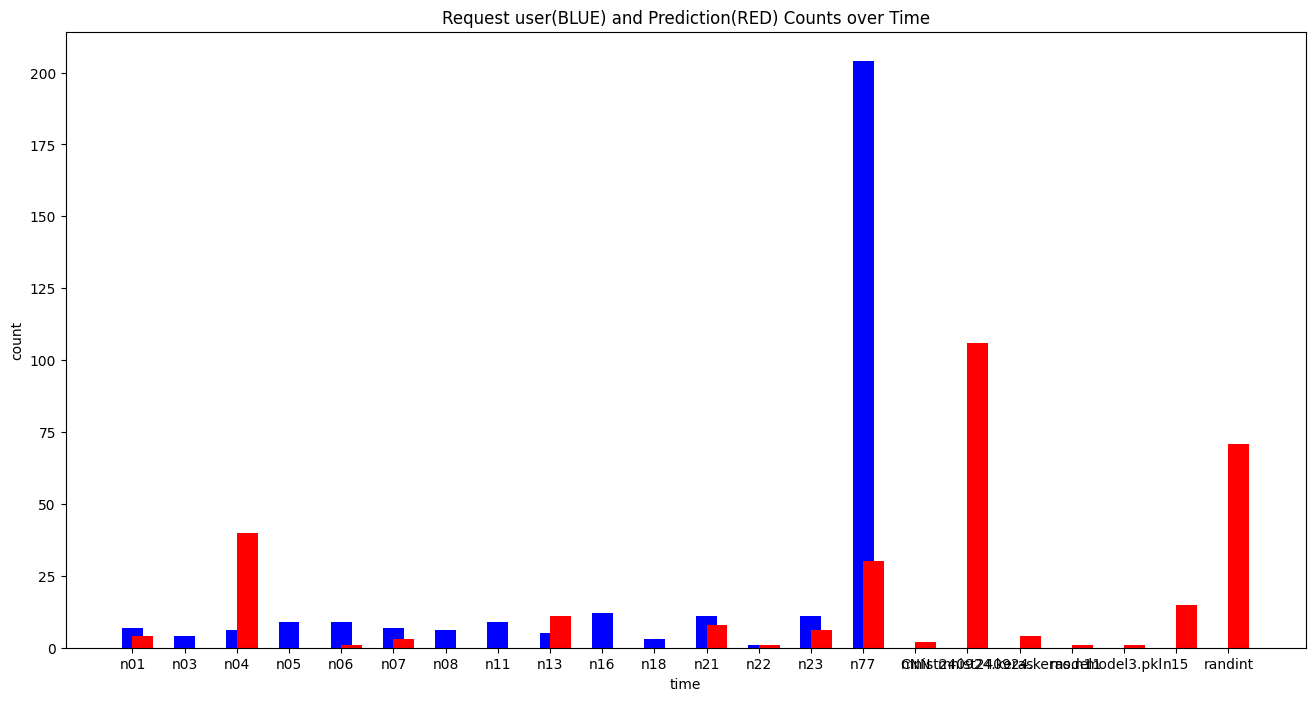

In [312]:
df_groupuser['request_count'] = df.groupby('request_user').size['num']
#df_groupuser['key'] = df_grouped.index
#df_groupuser['key']
df_groupuser['request_count']


In [309]:
#size() 
df_prediction = df.groupby('prediction_model').size()
df_prediction

prediction_model
CNN                        2
mnist240924.keras        106
mnist240924.keras.n11      4
model                      1
model3.pkl                 1
n01                        4
n04                       40
n06                        1
n07                        3
n13                       11
n15                       15
n21                        8
n22                        1
n23                        6
n77                       30
randint                   71
dtype: int64

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (16,) + inhomogeneous part.

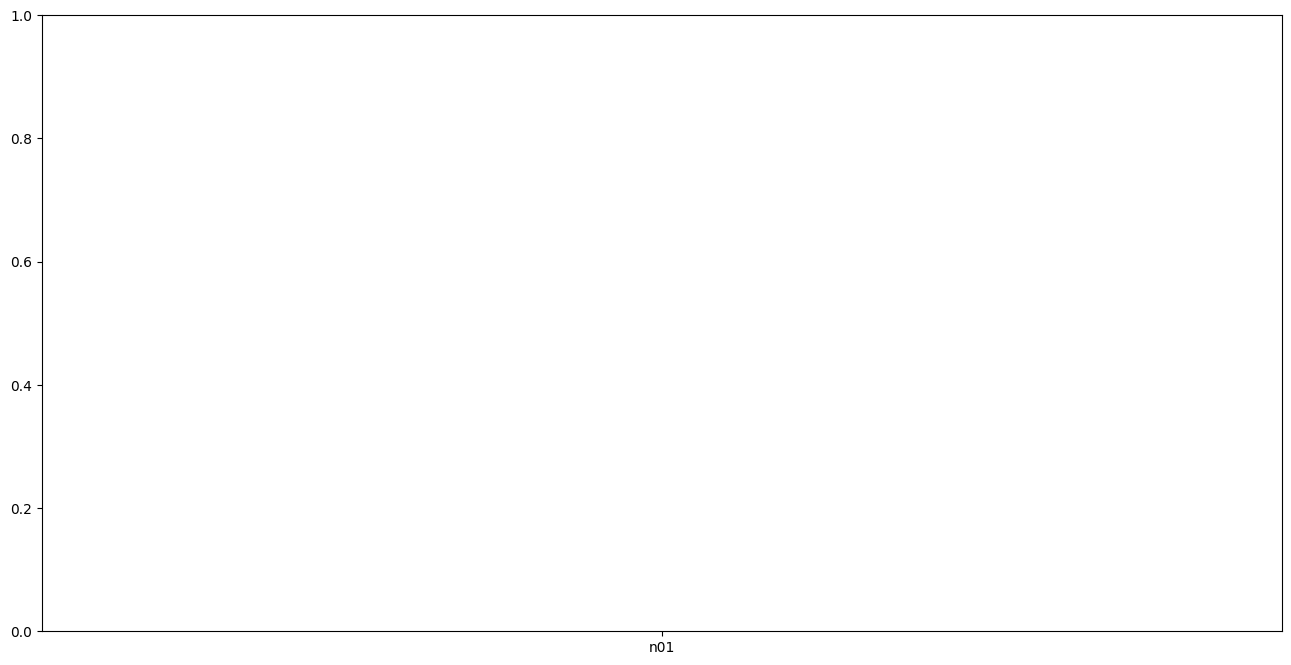

In [310]:
plt.figure(figsize=(16,8))
#.index .values
plt.bar(df_groupuser.index, df_groupuser.values)
plt.bar(df_prediction.index, df_prediction.values)

In [267]:
df1 = pd.merge(df_prediction, df_groupuser, left_index=True, right_index=True, how='outer',suffixes=('_predict', '_request'))
#df1['is_equal'] = df1['num_request'] == df1['num_predict']
df1['num_predict'] = df1['num_predict'].fillna(0).astype(int)
df1['num_request'] = df1['num_request'].fillna(0)
df1['num_request']['request_count']
df1.drop(index=df1.count())


/tmp/ipykernel_4947/906918065.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1.drop(index=df1.count()[0])


KeyError: '[np.int64(23)] not found in axis'

In [250]:
print(f" count  : {df1['num_request']}")
print(f" count  : {df1['num_predict']}")


 count  : CNN                                                                      0
mnist240924.keras                                                        0
mnist240924.keras.n11                                                    0
model                                                                    0
model3.pkl                                                               0
n01                                                                      7
n03                                                                      4
n04                                                                      6
n05                                                                      9
n06                                                                      9
n07                                                                      7
n08                                                                      6
n11                                                                      9
n13            

In [ ]:
df1 = df1.fillna(0)
df1_index = df1.index.values
df1
df1
df1['num_request'].count()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (23,) + inhomogeneous part.

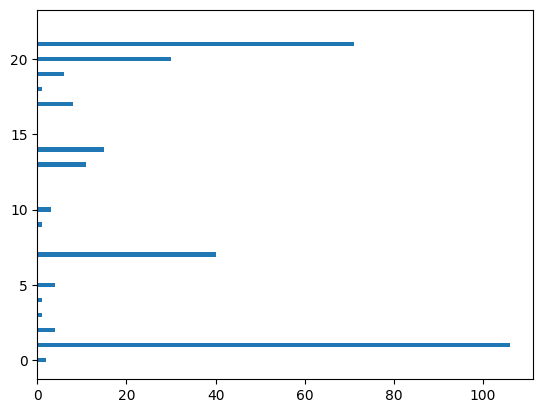

In [233]:
y = np.arange(0,23)
y1 = np.arange(0.2,23.2,1)
plt.barh(y,df1['num_predict'],height=0.3)
plt.barh(y1,df1['num_request'],height=0.2)
plt.yticks(np.arange(0, 23), labels=df1.index.values)